In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(cache_dir="/kaggle/input/mnist-dataset")
import numpy as np
path = "/kaggle/input/mnist-dataset/mnist.npz"
with np.load(path) as data:
    x_train = data["x_train"]
    y_train = data["y_train"]
    x_test = data["x_test"]
    y_test = data["y_test"]

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

2025-10-15 17:13:14.221475: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760548394.664678      26 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760548394.779987      26 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

I0000 00:00:1760548416.909914      26 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1760548416.911051      26 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/10


I0000 00:00:1760548420.566325      69 service.cc:148] XLA service 0x7b74ac0083c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760548420.567480      69 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760548420.567503      69 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760548420.859219      69 cuda_dnn.cc:529] Loaded cuDNN version 90300


  73/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5406 - loss: 1.6108

I0000 00:00:1760548421.863967      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8786 - loss: 0.4223 - val_accuracy: 0.9625 - val_loss: 0.1222
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9678 - loss: 0.1071 - val_accuracy: 0.9740 - val_loss: 0.0883
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9779 - loss: 0.0704 - val_accuracy: 0.9729 - val_loss: 0.0841
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9844 - loss: 0.0488 - val_accuracy: 0.9756 - val_loss: 0.0806
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0410 - val_accuracy: 0.9758 - val_loss: 0.0786
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9897 - loss: 0.0326 - val_accuracy: 0.9788 - val_loss: 0.0814
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9916 - loss: 0.0266 - val_accuracy: 0.9770 - val_loss: 0.0817
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9926 - loss: 0.0218 - val_accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.1063
Точність на тестових даних: 97.54%


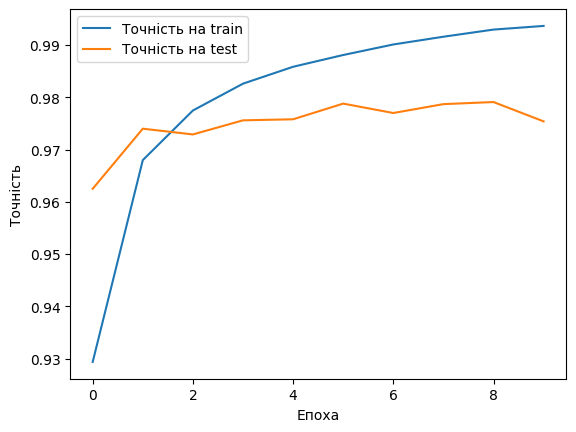

In [3]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Точність на тестових даних: {accuracy * 100:.2f}%")

plt.plot(history.history['accuracy'], label='Точність на train')
plt.plot(history.history['val_accuracy'], label='Точність на test')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


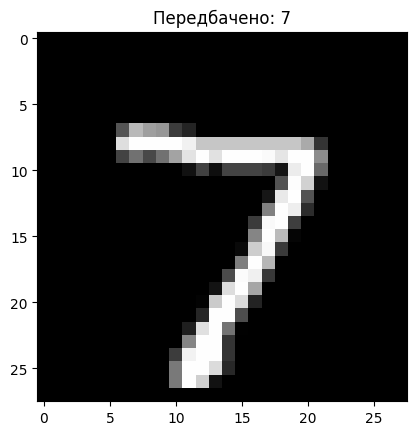

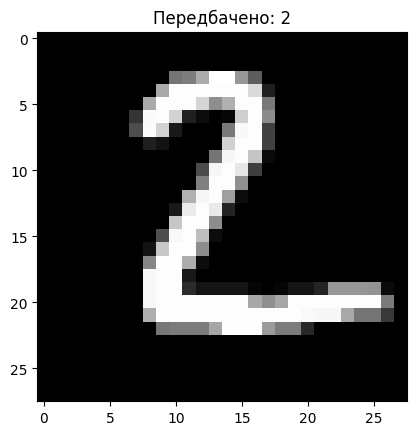

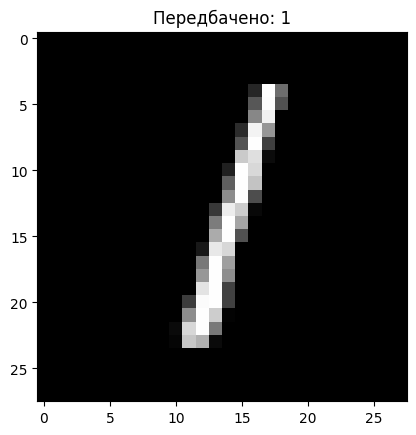

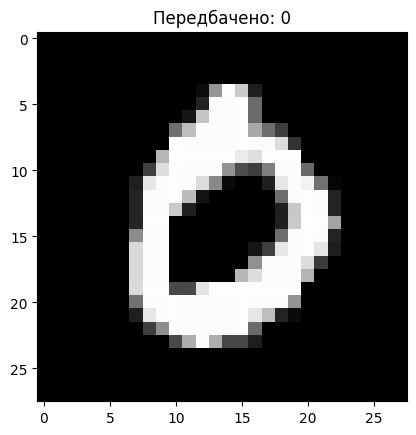

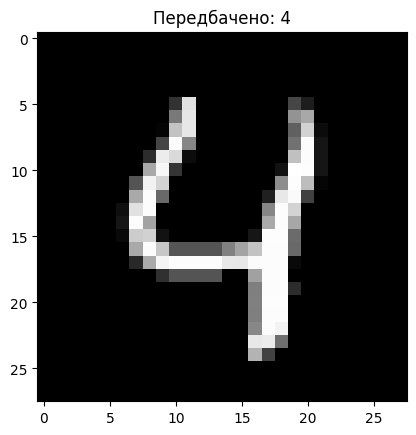

In [4]:
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Передбачено: {np.argmax(predictions[i])}")
    plt.show()

In [5]:
from sklearn import metrics


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy = 0.9754
Precision = 0.9757824978879384
Recall = 0.9754
F-Score = 0.9754092928760482


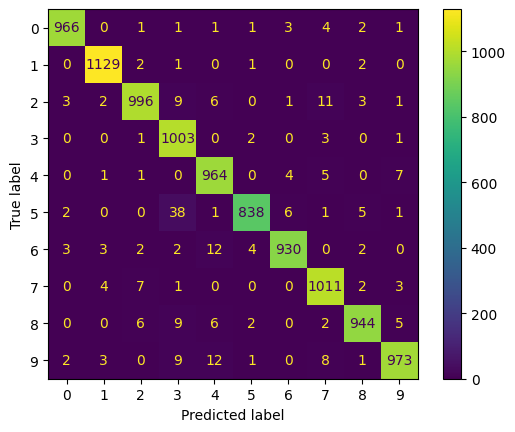

In [6]:
from sklearn import metrics

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

cm = metrics.confusion_matrix(y_test_labels, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = range(10))

print(f"Accuracy = {metrics.accuracy_score(y_test_labels, y_pred)}")
print(f"Precision = {metrics.precision_score(y_test_labels, y_pred, average='weighted')}")
print(f"Recall = {metrics.recall_score(y_test_labels, y_pred, average='weighted')}")
print(f"F-Score = {metrics.f1_score(y_test_labels, y_pred, average='weighted')}")

cm_display.plot()
plt.show()

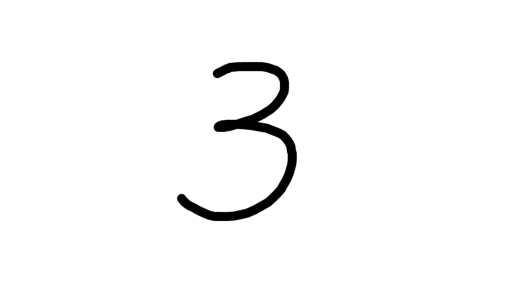

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


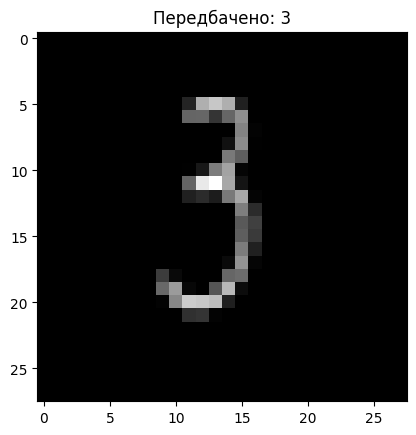

In [7]:
from PIL import Image, ImageOps
import matplotlib.image as mpimg

def recognize_num(image_path, model):
    plt.imshow(mpimg.imread(image_path))
    plt.axis('off')
    plt.show()
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img = ImageOps.invert(img)
    img_array = np.array(img).astype('float32') / 255.0
    img_array = img_array.reshape(1, 784)
    prediction = model.predict(img_array)
    num = np.argmax(prediction)
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title(f"Передбачено: {num}")
    plt.show()

recognize_num('/kaggle/input/handwritten-numbers/3.png', model)